# Mahalanobis Distance

This notebook shows how I think we should do Mahalanobis distance for the SECIM project. From JMP Website:

The Mahalanobis distance takes into account the correlation structure of the data and the individual scales. For each value, the Mahalanobis distance is denoted $M_i$ and is computed as

$M_i = \sqrt{(Y_i - \bar Y)^T S^{-1}(Y_i - \bar Y)}$

where:
* $Y_i$ is the data for the ith row
* Y is the row of means
* S is the estimated covariance matrix for the data

In [10]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import cPickle as pickle
import os

%matplotlib inline

## Generation of a simulated data set

As an example I will simulate a data set

In [11]:
covSim = np.array([[1.0, .8, .2, .2],
                   [.8, 1.0, .3, .3],
                   [.3, .3, 1.0, .8],
                   [.2, .2, .8, 1.0]])
np.random.seed(111)
datSim = np.random.multivariate_normal([2, 3, 8, 9], covSim, size=1000)
dfSim = pd.DataFrame(data=datSim, columns=['sample1', 'sample2', 'sample3', 'sample4'])

# Save for comparing in sas
dfSim.to_csv('/home/jfear/tmp/dfSim.csv', index=False)
 
dfSim.head()

,sample1,sample2,sample3,sample4
0,2.821596,4.333127,9.060183,9.220720
1,2.421120,3.247394,8.925715,9.795799
2,1.948334,2.812244,9.414377,10.056230
3,3.786460,4.284004,8.452335,9.852255
4,1.515989,3.221919,7.600073,8.164640


## Calculate Mahalanobis distance

There is a Mahalanobis function in scipy, but from what I can tell it only works on 1d arrays and not matrices. I think it will be easiest to o the calculation by hand.

In [12]:
# Calculate the covaranice matrix from the data
covHat = dfSim.cov()
covHat

,sample1,sample2,sample3,sample4
sample1,1.055661,0.833555,0.308716,0.278837
sample2,0.833555,0.990536,0.273956,0.249616
sample3,0.308716,0.273956,1.000202,0.783587
sample4,0.278837,0.249616,0.783587,0.970469


In [13]:
# Get the inverse of the covarance matrix
covHatInv = np.linalg.inv(covHat)
covHatInv

array([[ 2.87851495, -2.3524118 , -0.19111215, -0.0676822 ],
       [-2.3524118 ,  3.01887582, -0.05983838, -0.05227554],
       [-0.19111215, -0.05983838,  2.77626765, -2.17134267],
       [-0.0676822 , -0.05227554, -2.17134267,  2.81653131]])

In [14]:
# Calculate the column means
colMean = dfSim.mean(axis=0)
colMean

sample1    2.016073
sample2    3.015031
sample3    7.993385
sample4    9.019186
dtype: float64

In [15]:
# Subtract the mean from each value
dfSimCenter = (dfSim - colMean).T
dfSimCenter.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
sample1,0.805524,0.405047,-0.067739,1.770387,-0.500084,0.491167,0.349657,1.396824,-0.317541,0.145533,...,-0.063891,1.195296,1.232903,-1.478517,0.485055,1.142319,1.568161,-0.493987,-0.416602,2.481556
sample2,1.318096,0.232363,-0.202787,1.268973,0.206888,0.020347,-0.195840,1.771330,-0.195135,-0.992467,...,0.057818,1.873596,0.900250,-0.381725,-0.036286,0.987808,2.032395,-0.750410,0.855581,1.999373
sample3,1.066799,0.932330,1.420992,0.458950,-0.393312,0.168656,-1.424975,-0.616252,1.757483,-0.586115,...,-0.542625,0.073288,0.530720,-0.775142,0.737903,0.945534,1.140399,0.725193,-0.681701,0.625554
sample4,0.201533,0.776612,1.037044,0.833068,-0.854546,0.517748,-0.498351,-1.658697,1.529255,-0.185959,...,-0.947383,0.199141,0.007339,-0.376011,0.099328,0.534891,1.362770,-0.511936,-1.360179,-0.359304


In [16]:
# Calculate the mahalanobis distance
MD = np.sqrt(np.dot(np.dot(dfSimCenter.T, covHatInv), dfSimCenter))
MDval = np.diag(MD)

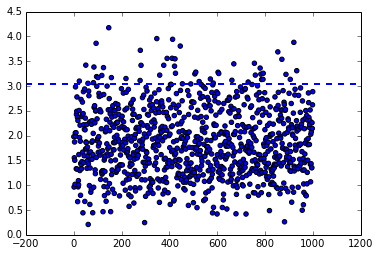

In [17]:
plt.scatter(x=range(len(MDval)), y=MDval)
plt.axhline(np.percentile(MDval, 95), ls='--', lw=2)
plt.show()